In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Feature values
x1 = np.array([1.1,2.2,2.5,4,5.2,6.1]) # first feature
x2 = np.array([1.4,2.1,2.9,5,5.1,6.7]) # second feature
assert len(x1) == len(x2)

In [3]:
# Combining features to data matrix
mat = np.array([x1, x2]).transpose()
print(mat)

[[1.1 1.4]
 [2.2 2.1]
 [2.5 2.9]
 [4.  5. ]
 [5.2 5.1]
 [6.1 6.7]]


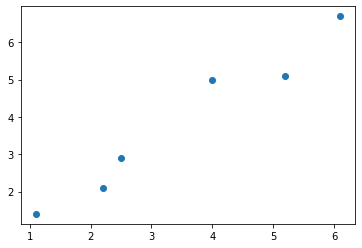

In [4]:
# Ploting the data
plt.scatter(mat[:,0], mat[:,1])
plt.show()

In [19]:
# Standardizing the features
mean1 = np.mean(mat[:,0])
std1 = np.std(mat[:,0])
# print(mean1)
mean2 = np.mean(mat[:,1])
std2 = np.std(mat[:,1])
# print(mean2)
z_mat = np.zeros(mat.shape)
# print(z_mat)
z_mat[:,0] = (mat[:,0] - mean1) / std1
z_mat[:,1] = (mat[:,1] - mean2) / std2
print(z_mat)

[[-1.38195552 -1.31932673]
 [-0.75292749 -0.9449232 ]
 [-0.58137439 -0.51703345]
 [ 0.2763911   0.60617714]
 [ 0.9626035   0.65966336]
 [ 1.4772628   1.51544286]]


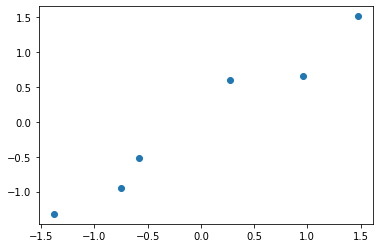

In [6]:
# Plotting the standardized data
plt.scatter(z_mat[:,0], z_mat[:,1])
plt.show()

In [7]:
# Computing the covariance matrix
covariance_mat = np.cov(z_mat.transpose())
print(covariance_mat)

[[1.2        1.17530862]
 [1.17530862 1.2       ]]


In [8]:
# Computing the eigendecomposition
eigen_values, eigen_vectors = np.linalg.eig(covariance_mat)
print("Eigenvectors: \n", eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

Eigenvalues: 
 [2.37530862 0.02469138] 



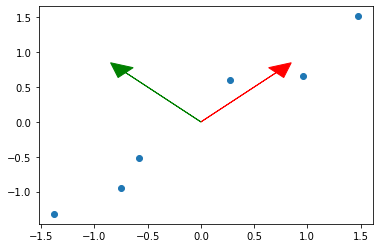

In [9]:
# Plotting of standarized data and eigenvectors
plt.scatter(z_mat[:,0], z_mat[:,1])
plt.arrow(0, 0, eigen_vectors[0,0], eigen_vectors[1,0], color='r',
          head_width=0.2, head_length=0.2)
plt.arrow(0, 0, eigen_vectors[0,1], eigen_vectors[1,1], color='g',
          head_width=0.2, head_length=0.2)
plt.show()

## Application of PCA

In [10]:
# Calculating Variance
variance_percentage = [(i/sum(eigen_values)) for i in sorted(eigen_values, reverse=True)]
print("Variance percentage :",variance_percentage)

# Constructing matrix using the one eigenvectors that correspond to the top one eigenvalues (largest), 
# to capture about 98.9% of the variance in this dataset

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]

# Sorting the Eigen pairs in descending order
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
print("Eigen Pairs are: ",eigen_pairs)

#Eigen vector of only top eigen value
featureVector = np.hstack((eigen_pairs[0][1][:, np.newaxis]))
print("Feature Vector:",featureVector)

# Transforming the data set
pcaDataset = z_mat.dot(featureVector)
print("Transformed DataSet:",pcaDataset)

Variance percentage : [0.9897119270282164, 0.010288072971783486]
Eigen Pairs are:  [(2.3753086248677198, array([0.70710678, 0.70710678])), (0.02469137513228037, array([-0.70710678,  0.70710678]))]
Feature Vector: [0.70710678 0.70710678]
Transformed DataSet: [-1.910095   -1.20056174 -0.77669163  0.62406999  1.1471159   2.11616247]


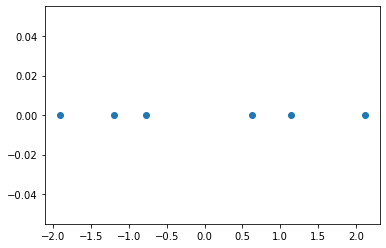

In [11]:
# Plotting the PC1 data
plt.scatter(pcaDataset,np.zeros(pcaDataset.shape))
plt.show()

## Reconstructing the data back from Principal components

In [20]:
#Reconstrcucting data to its original dimension
ReconstructedData = np.dot(pcaDataset.reshape(6,1),featureVector.transpose().reshape(1,2))
# print(ReconstructedData)

#De normalising the data
ReconstructedData[:,0] = (ReconstructedData[:,0]*std1)+mean1
ReconstructedData[:,1] = (ReconstructedData[:,1]*std2)+mean2
print("Final reconstructed data:",ReconstructedData)

Final reconstructed data: [[1.15476042 1.34145333]
 [2.03212571 2.27948147]
 [2.55625746 2.83985278]
 [4.28835332 4.69170933]
 [4.93511979 5.38319458]
 [6.1333833  6.66430851]]


## Plotting the final data

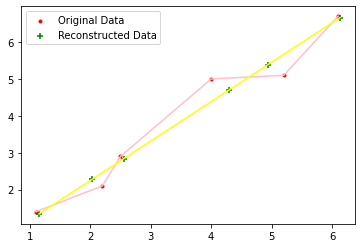

In [14]:
plt.scatter(mat[:,0],mat[:,1],color = 'red',marker='.',label="Original Data")
plt.scatter(ReconstructedData[:,0],ReconstructedData[:,1],color='green',marker='+',label="Reconstructed Data")
plt.plot(mat[:,0],mat[:,1],color='pink')
plt.plot(ReconstructedData[:,0],ReconstructedData[:,1],color='yellow')
plt.legend()
plt.show()

## Computing error of PCA

In [41]:
# Calculating Error introduced by PCA using RMSE
RMSE1 = np.sqrt(np.sum(np.square(mat[:,0]-ReconstructedData[:,0]))/6)
print("RMSE",RMSE1)

RMSE2 = np.sqrt(np.sum(np.square(mat[:,1]-ReconstructedData[:,1]))/6)
print("RMSE",RMSE2)

# Calculating Euclidean distance between Original Data and Reconstructed data
distanceAxis0 = np.sqrt(np.sum(np.square(mat[:,0]-ReconstructedData[:,0])))
distanceAxis1 = np.sqrt(np.sum(np.square(mat[:,1]-ReconstructedData[:,1])))

#Summing up the distances for each axis
print("Dimension 0 Error:",distanceAxis0)
print("Dimension 1 Error:",distanceAxis1)

# Sum of both axis
sumOfErrors = distanceAxis1+ distanceAxis0
print("Overall Error:",sumOfErrors)
d = np.sqrt(np.sum((w - w_in)**2))

RMSE 0.17737389522509553
RMSE 0.18963789345085647
Dimension 0 Error: 0.4344755369913696
Dimension 1 Error: 0.46451607485088214
Overall Error: 0.8989916118422517
